In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("housing.csv")

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# 4   total_bedrooms      20433 non-null  float64 some values are missing so we are going to drop it
# The inplace=True parameter in the dropna method (or other pandas DataFrame methods) determines whether the operation should be performed on the original DataFrame itself or if a new DataFrame should be returned with the changes applied.

# Here's what inplace=True does:

# inplace=True: 
# The operation will modify the original DataFrame directly, and no new DataFrame will be returned. 
# The method will return None.
# inplace=False (default behavior):
# The operation will not modify the original DataFrame. 
# Instead, it will return a new DataFrame with the changes applied.

data.dropna(inplace = True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
# This line imports the train_test_split function from the sklearn.model_selection module. 
# This function is used to split the data into training and testing sets.
from sklearn.model_selection import train_test_split

In [9]:
# This line creates a new DataFrame x that contains all the columns from the original data DataFrame except for the 'median_house_value' column.

# data.drop(['median_house_value'], axis=1) drops the 'median_house_value' column from data.
# axis=1 specifies that we're dropping a column (as opposed to a row).
# The resulting x DataFrame contains the feature variables that will be used as input for the model.
x = data.drop(['median_house_value'], axis = 1)

# This line creates a Series y that contains the values of the 'median_house_value' column from the original data DataFrame. 
# This column represents the target variable (the variable we want to predict).
y = data['median_house_value']

In [10]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [11]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [12]:
# Split the data into training and testing sets
# x_train and y_train will be used to train the model.
# x_test and y_test will be used to evaluate the model.
# test_size=0.2 specifies that 20% of the data should be used for testing, and the remaining 80% for training.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [13]:
train_data = x_train.join(y_train)

In [14]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
11386,-117.98,33.65,22.0,3335.0,754.0,1500.0,719.0,3.7315,<1H OCEAN,197900.0
1901,-119.99,38.88,17.0,2807.0,529.0,675.0,251.0,2.7457,INLAND,107800.0
19850,-119.23,36.39,39.0,1660.0,349.0,1061.0,306.0,1.4812,INLAND,53500.0
10886,-117.91,33.71,16.0,3113.0,783.0,1719.0,715.0,3.6505,<1H OCEAN,145700.0
20443,-118.85,34.27,50.0,187.0,33.0,130.0,35.0,3.3438,<1H OCEAN,500001.0
...,...,...,...,...,...,...,...,...,...,...
12820,-121.48,38.61,18.0,1511.0,315.0,1062.0,304.0,2.3438,INLAND,89400.0
5540,-118.43,33.96,16.0,14891.0,3984.0,6270.0,3595.0,5.1064,<1H OCEAN,283200.0
3409,-118.31,34.26,36.0,1882.0,453.0,1005.0,409.0,3.8000,<1H OCEAN,217100.0
9105,-118.09,34.63,31.0,1537.0,416.0,1239.0,397.0,1.9722,INLAND,99200.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

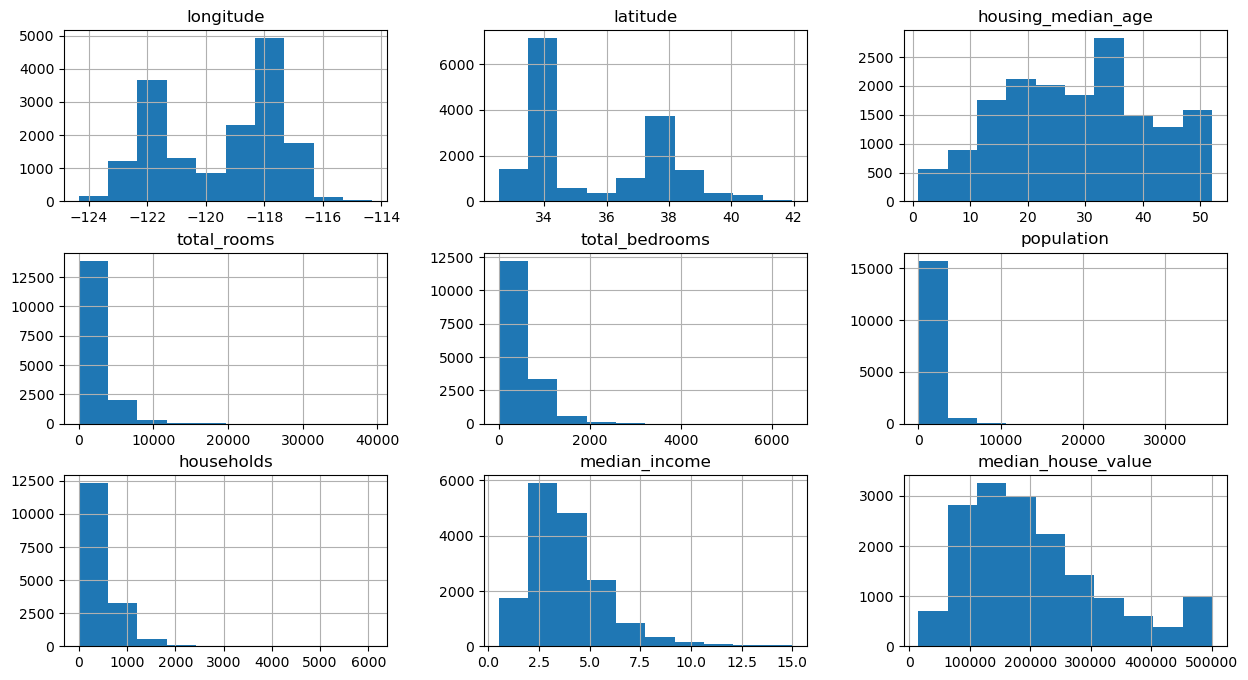

In [15]:
train_data.hist(figsize = (15,8))

In [16]:
# The train_data.corr() method in pandas is used to compute the pairwise correlation of columns in a DataFrame. 
# Correlation measures the statistical relationship between two variables.
# Indicating how one variable may change when the other variable changes. The values range from -1 to 1:

# 1 indicates a perfect positive correlation: as one variable increases, the other variable also increases.
# -1 indicates a perfect negative correlation: as one variable increases, the other variable decreases.
# 0 indicates no correlation: there is no linear relationship between the variables.
train_data.corr()

C:\Users\psriz\AppData\Local\Temp\ipykernel_11544\530839133.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924855,-0.108369,0.041757,0.066220,0.097252,0.053758,-0.017342,-0.045502
latitude,-0.924855,1.000000,0.013354,-0.035101,-0.066027,-0.107157,-0.071018,-0.077652,-0.143544
housing_median_age,-0.108369,0.013354,1.000000,-0.358083,-0.317422,-0.290023,-0.299791,-0.117826,0.104207
total_rooms,0.041757,-0.035101,-0.358083,1.000000,0.928441,0.855229,0.919856,0.194996,0.133608
total_bedrooms,0.066220,-0.066027,-0.317422,0.928441,1.000000,0.874325,0.981225,-0.012752,0.050702
population,0.097252,-0.107157,-0.290023,0.855229,0.874325,1.000000,0.902093,0.001440,-0.025925
households,0.053758,-0.071018,-0.299791,0.919856,0.981225,0.902093,1.000000,0.009610,0.066520
median_income,-0.017342,-0.077652,-0.117826,0.194996,-0.012752,0.001440,0.009610,1.000000,0.685564
median_house_value,-0.045502,-0.143544,0.104207,0.133608,0.050702,-0.025925,0.066520,0.685564,1.000000


C:\Users\psriz\AppData\Local\Temp\ipykernel_11544\3008388907.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot = True, cmap = 'plasma')


<Axes: >

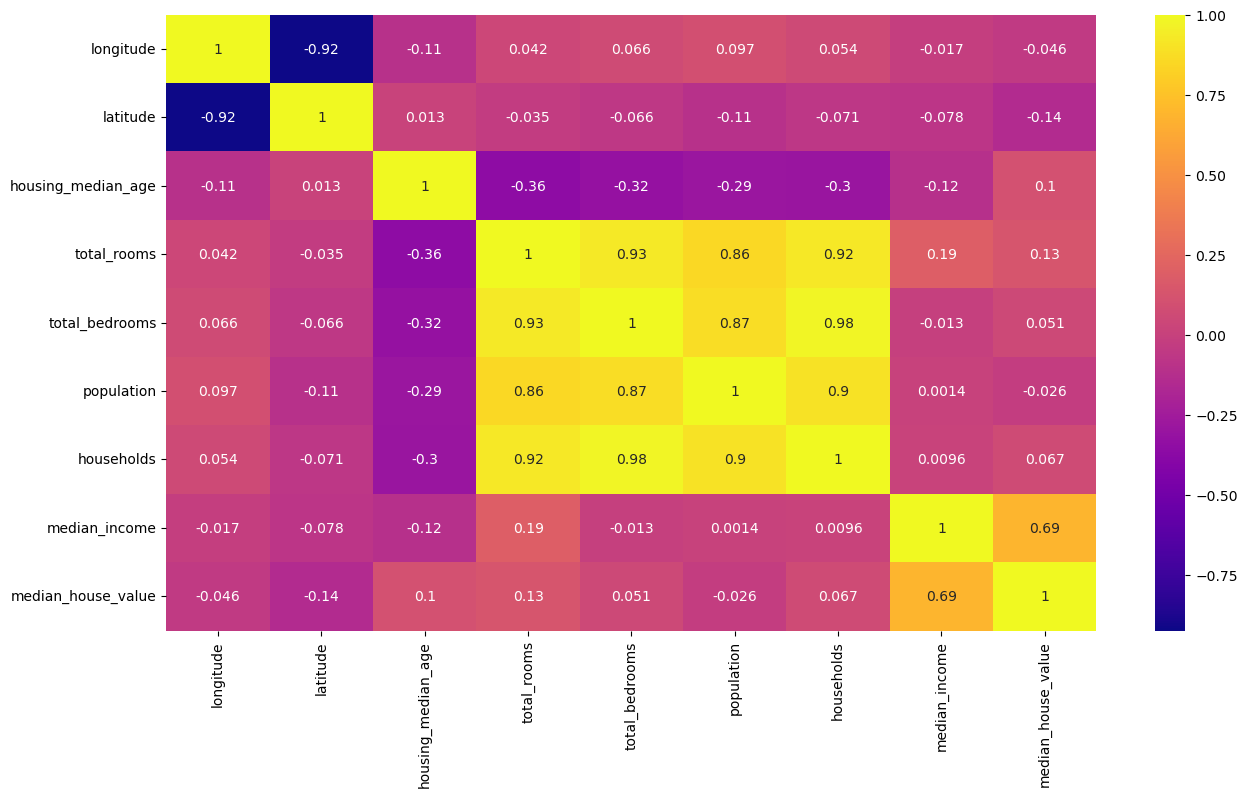

In [17]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(), annot = True, cmap = 'plasma')

In [18]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

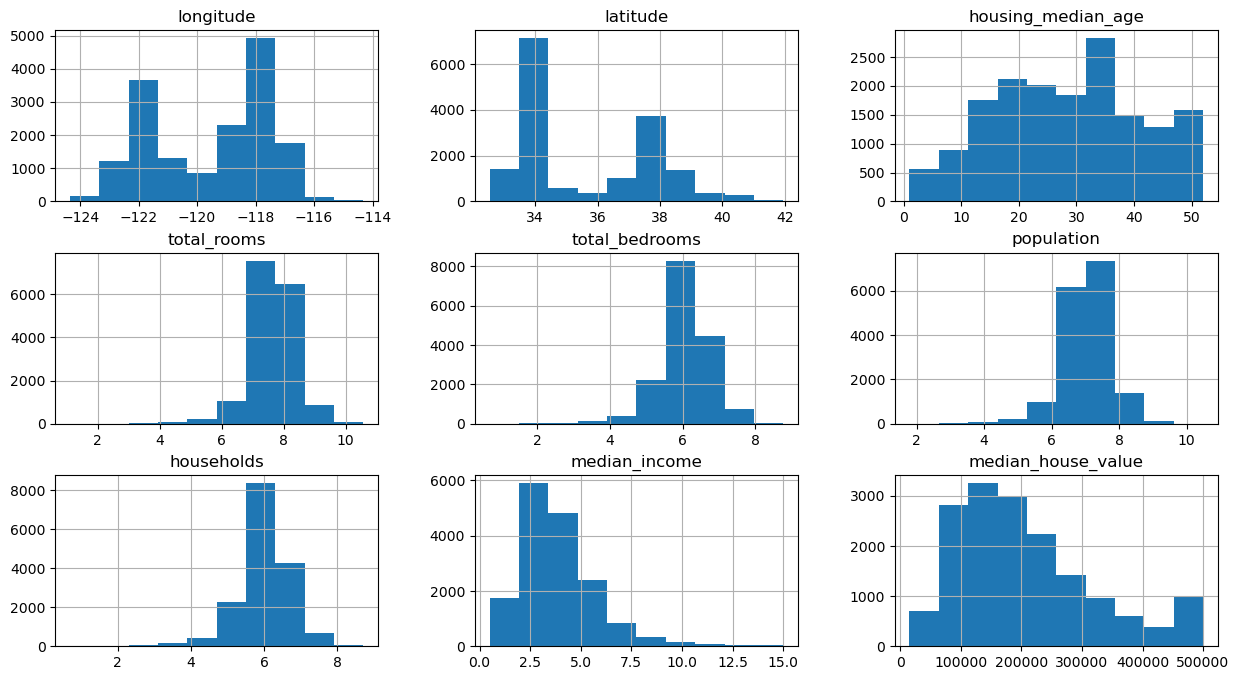

In [19]:
train_data.hist(figsize = (15,8))

In [20]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7276
INLAND        5149
NEAR OCEAN    2092
NEAR BAY      1825
ISLAND           4
Name: ocean_proximity, dtype: int64

#### pd.get_dummies(train_data.ocean_proximity): This function converts the categorical ocean_proximity column into one-hot encoded columns. One-hot encoding transforms the categorical variable into a format that can be provided to ML algorithms to do a better job in prediction. For example, if ocean_proximity had values like 'NEAR BAY', 'INLAND', 'NEAR OCEAN', etc., this function will create separate binary (0 or 1) columns for each unique value.
#### train_data.join(...): The join method combines the original train_data DataFrame with the one-hot encoded columns created by pd.get_dummies. This effectively adds the new one-hot encoded columns to the train_data DataFrame.
#### .drop(['ocean_proximity']): The drop method removes the original ocean_proximity column from the train_data DataFrame since it is no longer needed after the one-hot encoding.

In [21]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

In [22]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
11386,-117.98,33.65,22.0,8.112528,6.626718,7.313887,6.579251,3.7315,197900.0,1,0,0,0,0
1901,-119.99,38.88,17.0,7.940228,6.272877,6.516193,5.529429,2.7457,107800.0,0,1,0,0,0
19850,-119.23,36.39,39.0,7.415175,5.857933,6.967909,5.726848,1.4812,53500.0,0,1,0,0,0
10886,-117.91,33.71,16.0,8.043663,6.664409,7.450080,6.573680,3.6505,145700.0,1,0,0,0,0
20443,-118.85,34.27,50.0,5.236442,3.526361,4.875197,3.583519,3.3438,500001.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12820,-121.48,38.61,18.0,7.321189,5.755742,6.968850,5.720312,2.3438,89400.0,0,1,0,0,0
5540,-118.43,33.96,16.0,9.608579,8.290293,8.743691,8.187577,5.1064,283200.0,1,0,0,0,0
3409,-118.31,34.26,36.0,7.540622,6.118097,6.913737,6.016157,3.8000,217100.0,1,0,0,0,0
9105,-118.09,34.63,31.0,7.338238,6.033086,7.122867,5.986452,1.9722,99200.0,0,1,0,0,0


<Axes: >

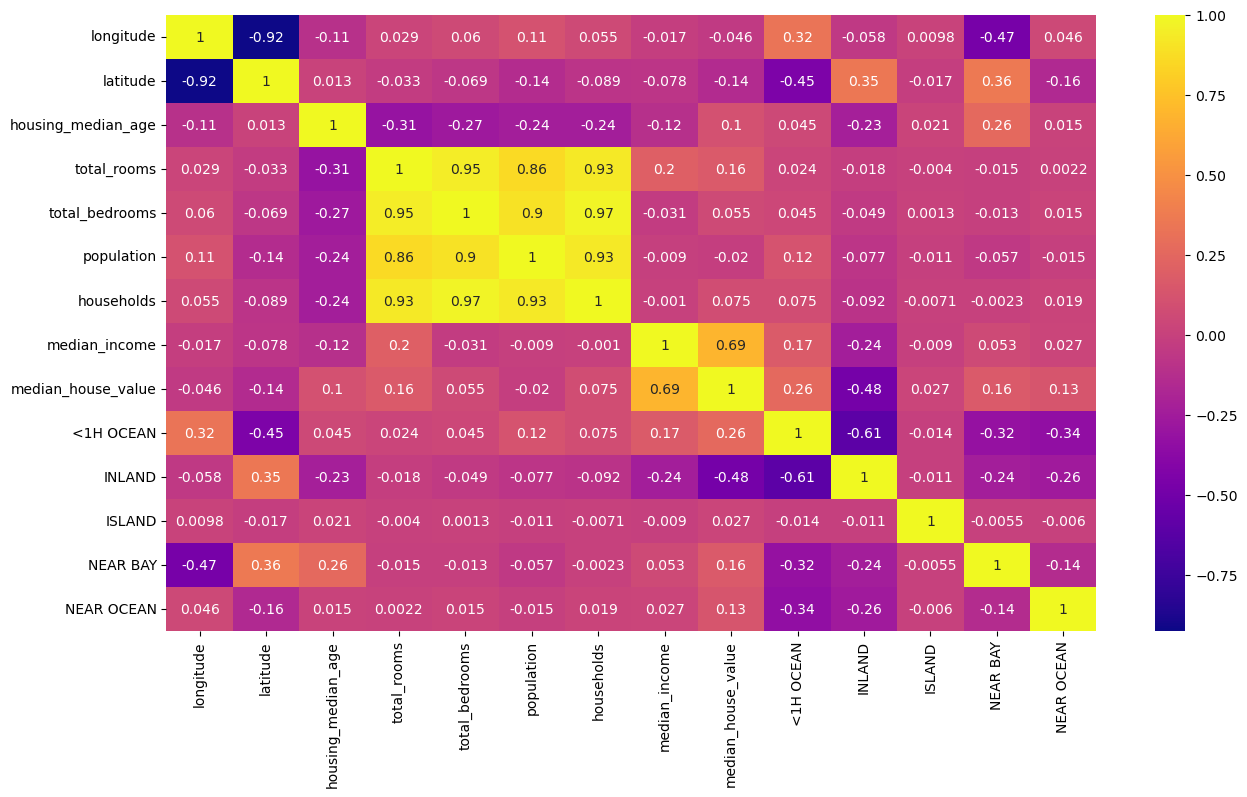

In [23]:
# Options that you can use in place of cmap
# 'viridis'
# 'plasma'
# 'inferno'
# 'magma'
# 'cividis'
# 'Blues'
# 'Reds'
# 'Greens'
# 'Purples'
# 'Oranges'
# 'PuBu'
# 'BuPu'
# 'GnBu'

plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(), annot = True, cmap = 'plasma')

#### The more red it gets, the more expensive the house is, and the more blue it gets, the less expensive the house is.
#### Houses that are closer to the coast are more expensive.
#### Below is an actual map of california for your comparison

<Axes: xlabel='latitude', ylabel='longitude'>

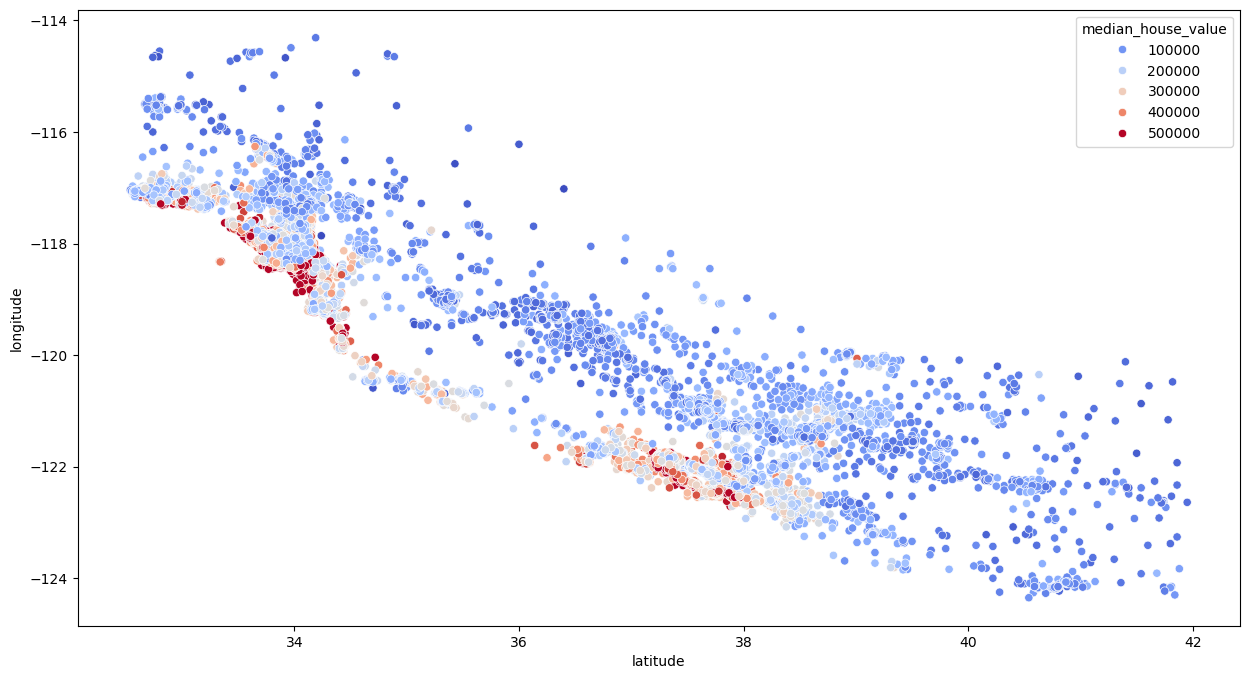

In [24]:
plt.figure(figsize = (15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette = "coolwarm")

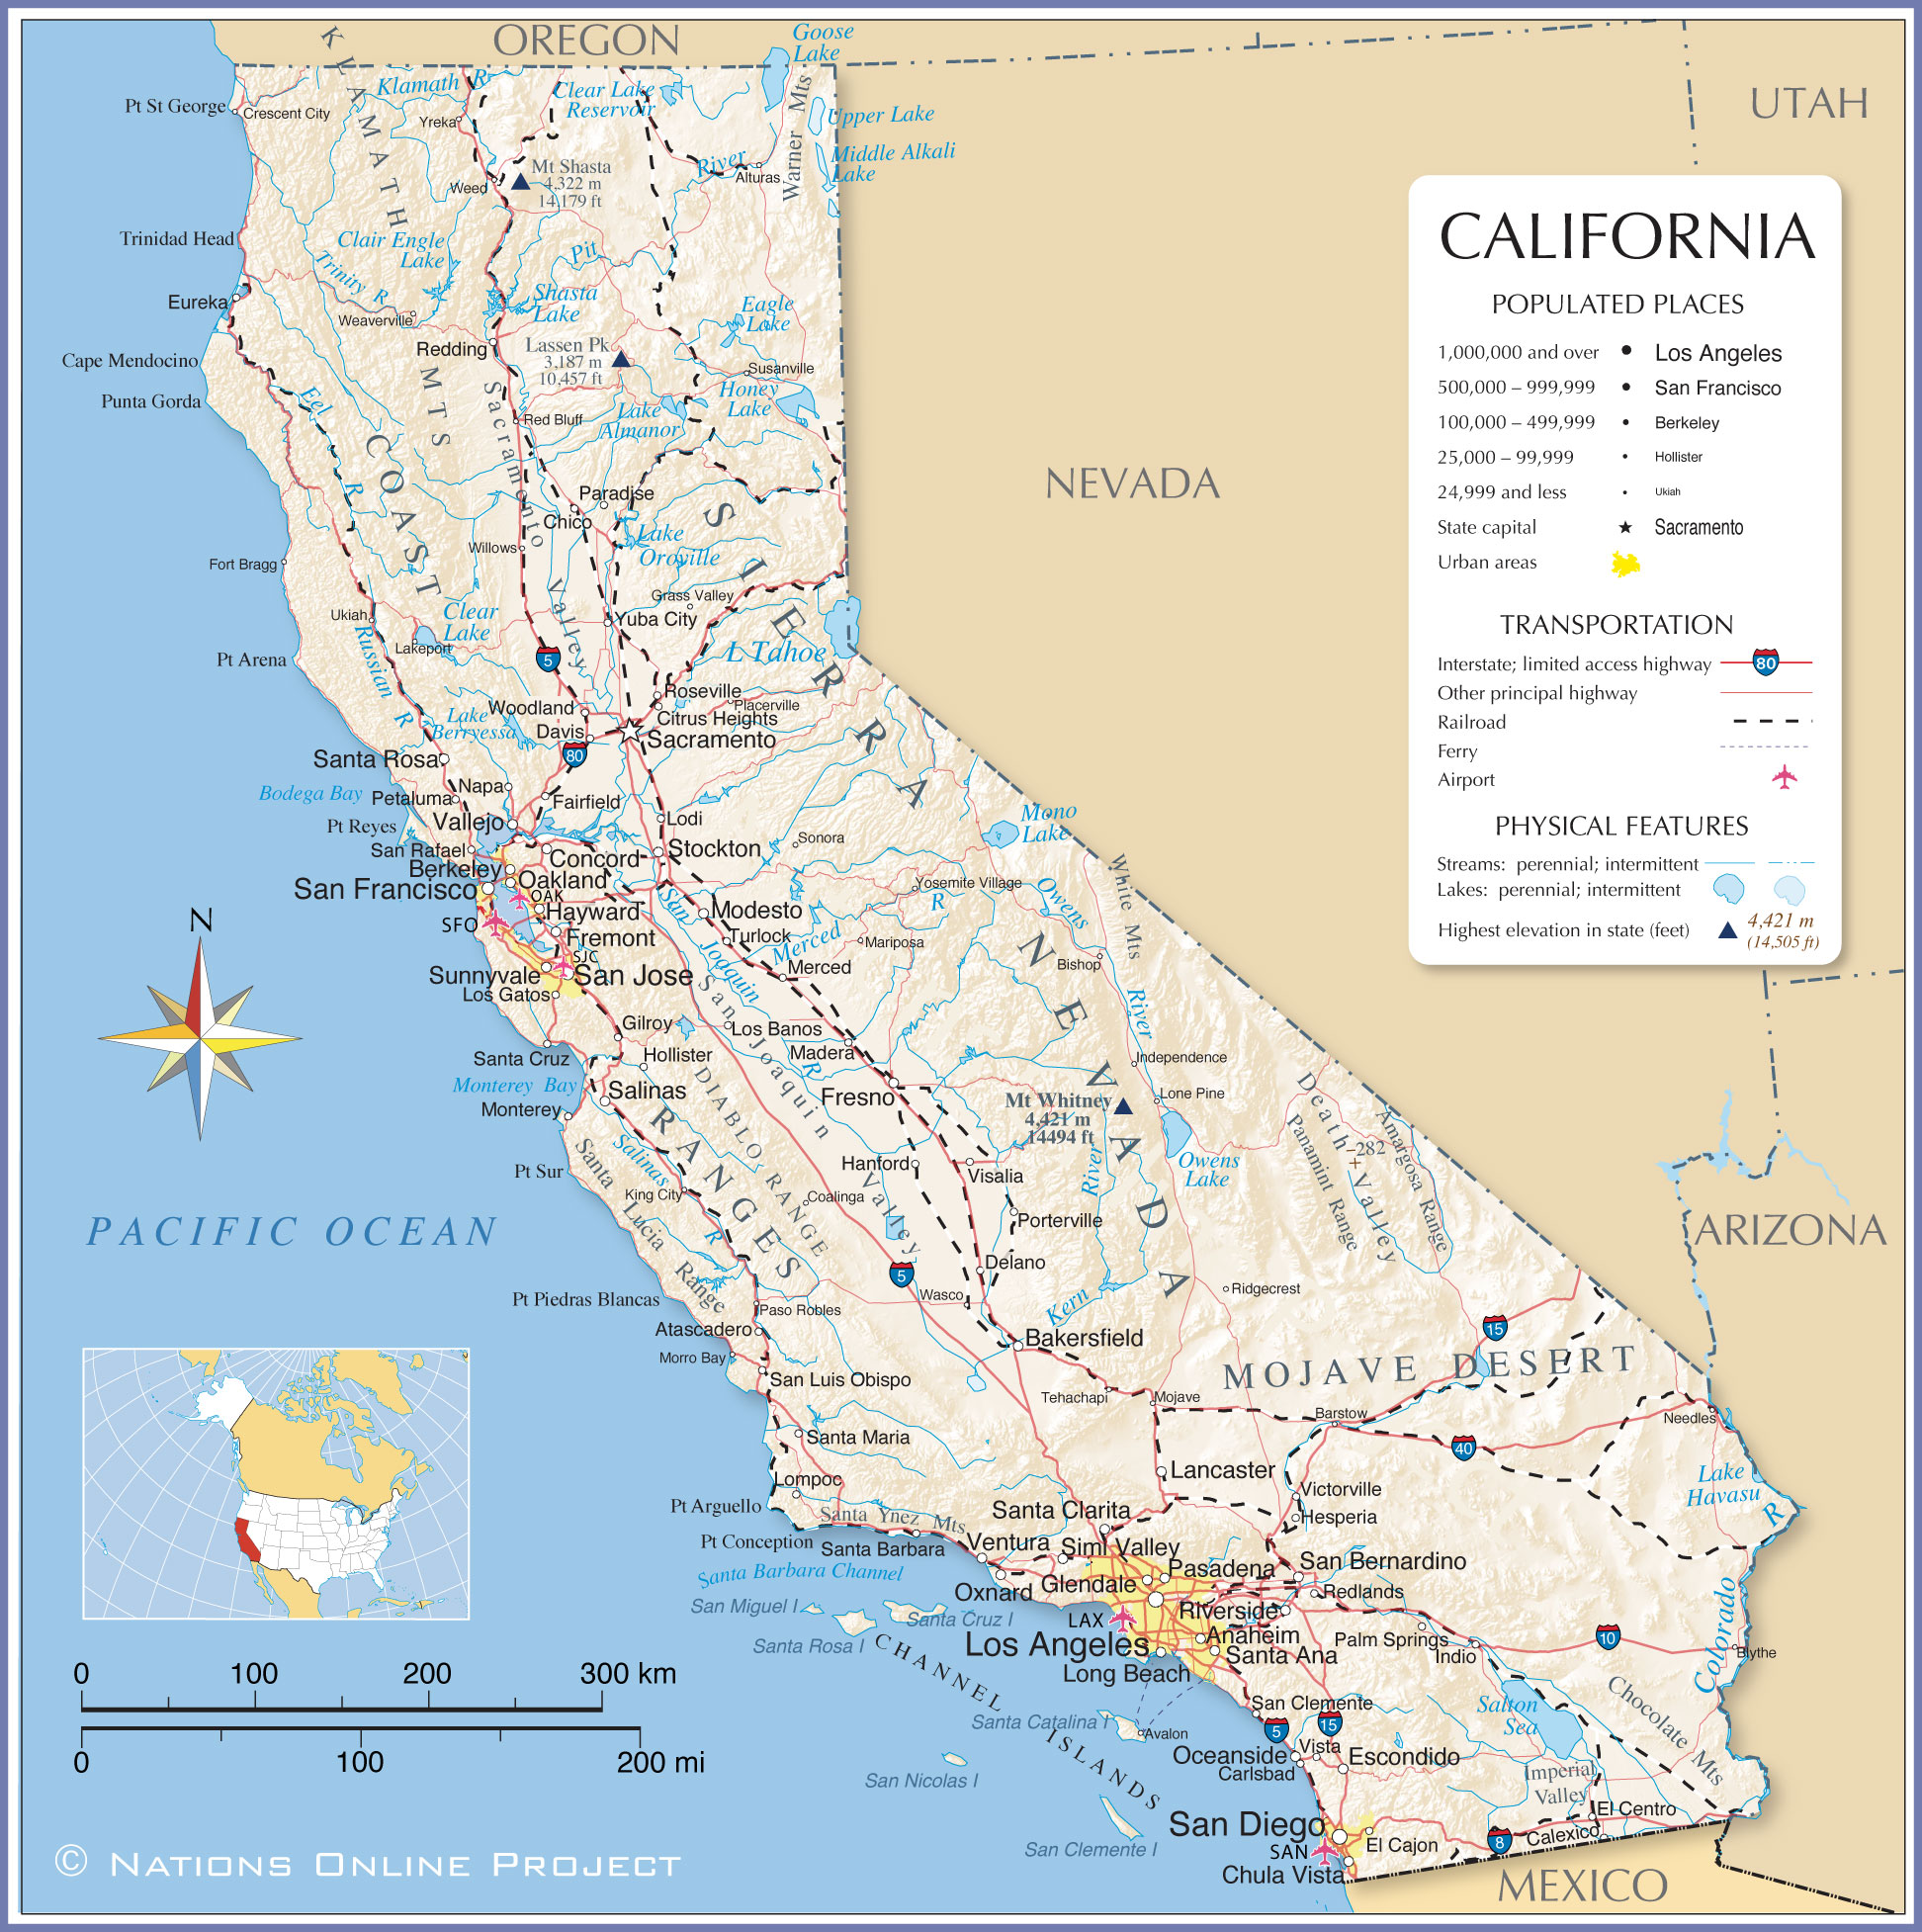

In [25]:
from IPython.display import Image, display
# Displaying an image
display(Image(filename='california_map.jpg'))

In [26]:
train_data['bedrooom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

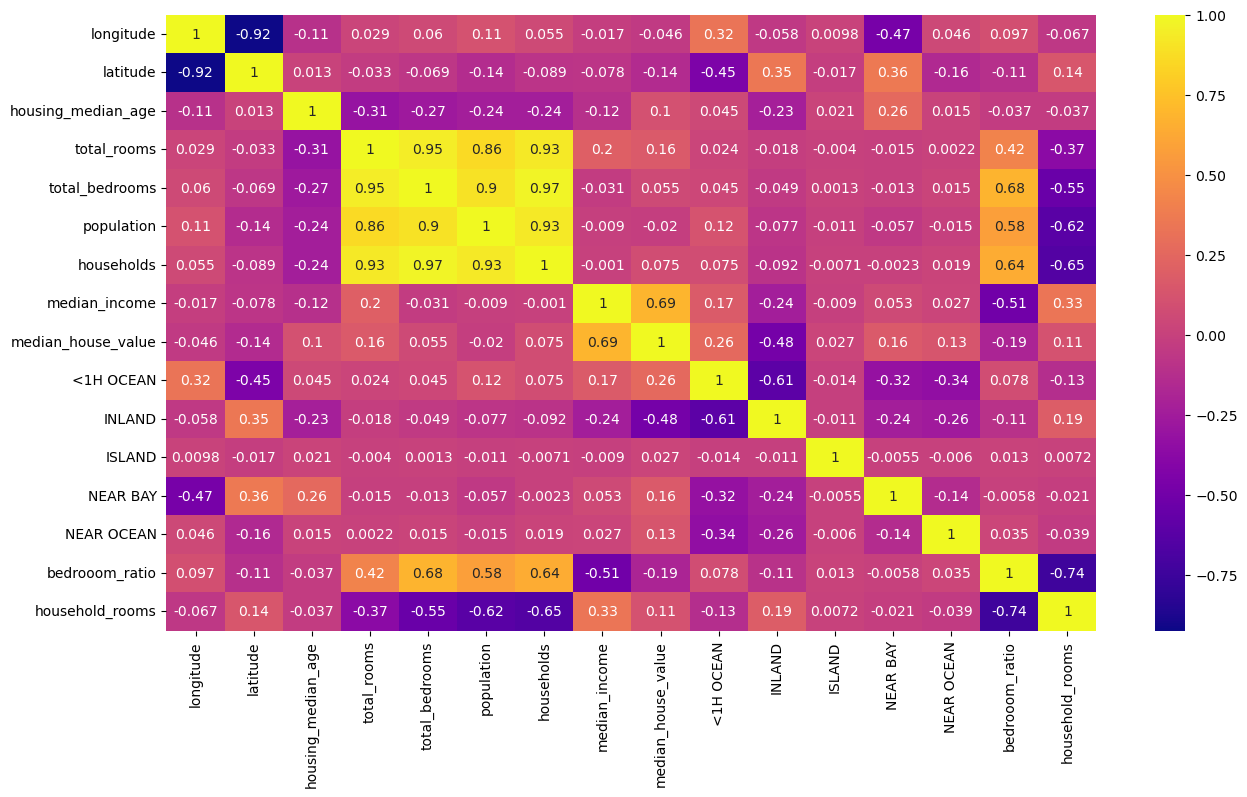

In [27]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(), annot = True, cmap = 'plasma')